# ADVANCED NOTEBOOK4 - Adam NOWAK

### Analysis of E-commerce dataset from Kaggle
https://www.kaggle.com/datasets/carrie1/ecommerce-data/data

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers." 

We have 8 columns which contains InvoiceNo, StockCode, Description (product name), quantity, invoiceDate, UnitPrice (product price), CustomerID, CustomerCountry. 





In [67]:
import pandas as pd
from sklearn.mixture import GaussianMixture

In [68]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Cleaning data

In [70]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Maybe we will need to delete rows which nulls, but for now they are ok. 

In [71]:
#droping useless columns 
df = df.dropna(subset=['Description'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
len(df)

530104

In [72]:
df.describe() 
#of course customerId columns here is useless

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [73]:
df['Total_sales'] = df['Quantity'] * df['UnitPrice']
sales_by_country = df.groupby('Country')['Total_sales'].sum().sort_values(ascending=False)
sales_by_country

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

### Finding closest neighbour 

In [74]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer

df_sample = df.sample(200, random_state=40)

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

#nearestneigghbour model 
nn = NearestNeighbors(n_neighbors=2, metric='cosine')
nn.fit(description_vectors_array)

#finding closest neighbours 
distances, indices = nn.kneighbors(description_vectors_array)

df_neighbors = pd.DataFrame({
    'Description (Product)': [i for i in range(len(df_sample))],
    'Closest neighbour' : [indices[i][1] for i in range(len(indices))],
    'Distances' : [distances[i][1] for i in range(len(distances))],
})

df_neighbors


,Description (Product),Closest neighbour,Distances
0,0,36,0.452277
1,1,131,0.552786
2,2,121,0.422650
3,3,26,0.646447
4,4,50,0.591752
...,...,...,...
195,195,76,0.591752
196,196,1,1.000000
197,197,155,0.483602
198,198,152,0.500000


Lowest Distances (cosine metric) means that descriptions are closer to each other. (0 means that they're identical). It is useful to recommendation system for buyers. 

In [75]:
from sklearn.metrics import pairwise_distances

df_sample = df.sample(200, random_state=40)

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

dist = pairwise_distances(description_vectors_array, metric='euclidean')

df_dist_neighbors = pd.DataFrame(dist,
                                 columns=df_sample['Description'].values,
                                 index=df_sample['Description'].values)

df_dist_neighbors.head(10) #only 10 rows 



,SET OF 4 FAIRY CAKE PLACEMATS,CHOCOLATE 3 WICK MORRIS BOX CANDLE,GREEN ROUND COMPACT MIRROR,CLASSIC METAL BIRDCAGE PLANT HOLDER,LARGE ZINC HEART WALL ORGANISER,RED RETROSPOT CUP,LUNCH BAG PAISLEY PARK,BAG 125g SWIRLY MARBLES,RETROSPOT CIGAR BOX MATCHES,GARDENERS KNEELING PAD KEEP CALM,...,ALARM CLOCK BAKELIKE RED,HOME SWEET HOME MUG,EDWARDIAN PARASOL PINK,SET OF 12 MINI LOAF BAKING CASES,WOODLAND CHARLOTTE BAG,TEA TIME PARTY BUNTING,HEARTS STICKERS,SILVER GLITTER FLOWER VOTIVE HOLDER,WALL ART ONLY ONE PERSON,"METAL SIGN,CUPCAKE SINGLE HOOK"
SET OF 4 FAIRY CAKE PLACEMATS,0.000000,3.000000,2.828427,3.000000,3.000000,2.828427,3.000000,2.449490,2.645751,2.645751,...,2.449490,3.162278,2.645751,2.449490,2.828427,2.828427,2.236068,2.828427,2.645751,3.000000
CHOCOLATE 3 WICK MORRIS BOX CANDLE,3.000000,0.000000,2.645751,2.828427,2.828427,2.645751,2.828427,2.236068,2.000000,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.645751,2.645751,2.000000,2.645751,2.449490,2.828427
GREEN ROUND COMPACT MIRROR,2.828427,2.645751,0.000000,2.645751,2.645751,2.449490,2.645751,2.000000,2.236068,2.236068,...,2.000000,2.828427,2.236068,2.828427,2.449490,2.449490,1.732051,2.449490,2.236068,2.645751
CLASSIC METAL BIRDCAGE PLANT HOLDER,3.000000,2.828427,2.645751,0.000000,2.828427,2.645751,2.828427,2.236068,2.449490,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.645751,2.645751,2.000000,2.236068,2.449490,2.449490
LARGE ZINC HEART WALL ORGANISER,3.000000,2.828427,2.645751,2.828427,0.000000,2.645751,2.828427,2.236068,2.449490,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.645751,2.645751,2.000000,2.645751,2.000000,2.828427
RED RETROSPOT CUP,2.828427,2.645751,2.449490,2.645751,2.645751,0.000000,2.645751,2.000000,1.732051,2.236068,...,1.414214,2.828427,2.236068,2.828427,2.449490,2.449490,1.732051,2.449490,2.236068,2.645751
LUNCH BAG PAISLEY PARK,3.000000,2.828427,2.645751,2.828427,2.828427,2.645751,0.000000,1.732051,2.449490,2.449490,...,2.236068,3.000000,2.449490,3.000000,2.236068,2.645751,2.000000,2.645751,2.449490,2.828427
BAG 125g SWIRLY MARBLES,2.449490,2.236068,2.000000,2.236068,2.236068,2.000000,1.732051,0.000000,1.732051,1.732051,...,1.414214,2.449490,1.732051,2.449490,1.414214,2.000000,1.000000,2.000000,1.732051,2.236068
RETROSPOT CIGAR BOX MATCHES,2.645751,2.000000,2.236068,2.449490,2.449490,1.732051,2.449490,1.732051,0.000000,2.000000,...,1.732051,2.645751,2.000000,2.645751,2.236068,2.236068,1.414214,2.236068,2.000000,2.449490
GARDENERS KNEELING PAD KEEP CALM,2.645751,2.449490,2.236068,2.449490,2.449490,2.236068,2.449490,1.732051,2.000000,0.000000,...,1.732051,2.645751,2.000000,2.645751,2.236068,2.236068,1.414214,2.236068,2.000000,2.449490


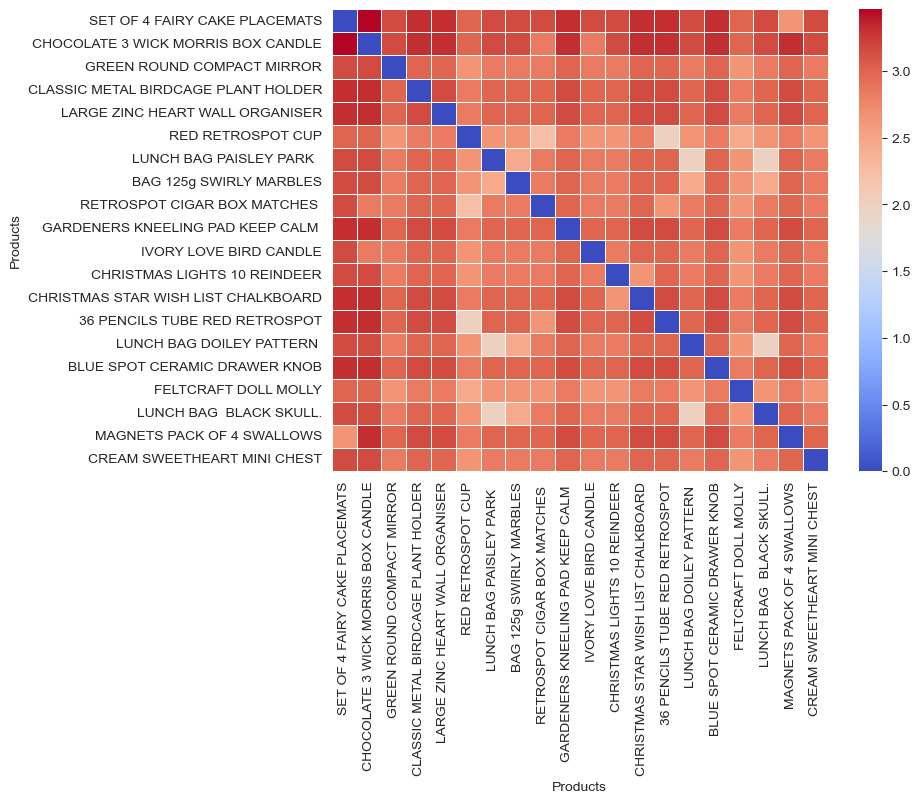

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
df_sample_Limited = df_sample.head(20)

description_vectors = vectorizer.fit_transform(df_sample_Limited['Description'])
description_vectors_array = description_vectors.toarray()

dist = pairwise_distances(description_vectors_array, metric='euclidean')

df_dist_neighbors = pd.DataFrame(dist,
                                 columns=df_sample_Limited ['Description'].values,
                                 index=df_sample_Limited['Description'].values)

plt.figure(figsize=(8, 6))
sns.heatmap(df_dist_neighbors, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xlabel('Products')
plt.ylabel('Products')
plt.show()


Lowest value means products are closer. And this time I used euclidean metric and pairwise_distances.

### Scaling up k-NN search by storing data in a KD-tree. 

In [77]:
df_sample = df.sample(200, random_state=40)

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

#creating kd_tree as a data structure
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree', metric='euclidean')
nn.fit(description_vectors_array)

distances, indices = nn.kneighbors(description_vectors_array)

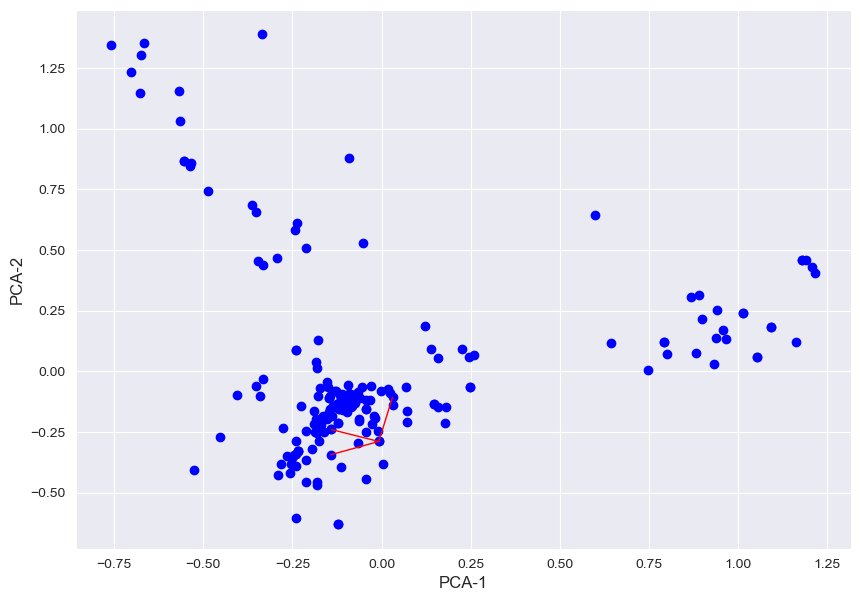

In [197]:
import numpy as np
from sklearn.decomposition import PCA

#redukcja do 2 wymiarów  - sluzy do tego aby reprezentowac dane w 2 wymiarach jak najlepiej 
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(description_vectors_array)

fig, ax = plt.subplots(figsize=(10, 7))

'''2
reduced_data[:, 0], reduced_data[:, 1] - współrzedne produktów w 2 wymiarach, 
first axis PCA1 - wyjaśnia: największą zmienność w danych. 
Kiedy przeprowadzamy PCA na naszych danych, pierwsza składowa główna jest kierunkiem, 
w którym produkty różnią się najbardziej, gdy spojrzymy na wszystkie ich cechy.

second axis PCA2 - drugą największą zmienność w danych, ale po uwzględnieniu zmienności, którą już wyjaśniała pierwsza składowa.
jest prostopadła do PCA1 i uwzglednia to co PCA1 nie uwzgledniła 

'''
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c='blue', marker='o')

random_product_index = np.random.randint(0, len(reduced_data))
products_cords = reduced_data[random_product_index] #choosing random point to draw line to his closest neighbours 
nearest_neighbors_indices = indices[random_product_index][1:5] #4 closest friends 

#drawing lines between 4 closest friends 
for neighbor_index in nearest_neighbors_indices:
    neighbor_coords = reduced_data[neighbor_index] #closest friends cords 
    ax.plot([products_cords[0], neighbor_coords[0]], 
            [products_cords[1], neighbor_coords[1]], 
            'r-', lw=1)  #r- : linia ciagła i czerwona

ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)

plt.show()

On the plot presented above we can observe: 

1. Closer points are to each other more similar they are. Their qualities are more similar. 
2. The red lines drawn between the random product and its 4 closest neighbors show the relationships between similar products. Products connected by shorter lines are more similar to each other in terms of their features


## LSH for nearest neighbour search

This algorithm approximate results, but works much faster in comparison with KD-tree. 
This is especially useful in huge and multidimensional cases. 

### First of all: MinHash
This technique is used to compare similarities between datasets. This allows us to represent products descriptions with hash not full vector. 
Then this hashes will be used to compare description to find nearest neighbours. 



In [79]:
df_sample = df.sample(200, random_state=40)

#przeksztalcamy na wketory cech gdzie jedna cecha (feature) to jedno słowo z Description
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", max_features=200)
description_vectors = vectorizer.fit_transform(df_sample['Description'])
description_vectors_array = description_vectors.toarray()

Generally it's better to do such a things on more complex texts, not just few words form Product Description, but the idea here is more important than the results ;)))


In [80]:
#creating minHash for each vector 
from datasketch import MinHash, MinHashLSH

#permutacje czyli rózne funckje haszujace do przybliżenia wyniku 
#dla kazdej funckji znaleziony zostaje element o najmniejszych hashu
#dla każdego wektora (podzielone Description) tworze hashes. 
def min_hash(vector, num_permutations = 128):
    m = MinHash(num_perm=num_permutations)
    for idx, val in enumerate(vector):
        if val > 0: 
            m.update(str(idx).encode('utf-8'))
    
    return m

In [81]:
minhashes = [min_hash(vector) for vector in description_vectors_array]
print(minhashes[0].hashvalues)

[ 752101190 1188281286  380209635   31312792  482676384  381105215
 1724693644  714269000  942190313 1461437663  897626555 1896022193
  147878815  113170197 1246274840  232456057  303782223  354751176
  160852472 1257026192  202156280  238376316  131859052  266439028
  585336044  533142530  247430539 1701580170  219470035 1233041578
   55284450 1240567636  506557908   50944269 1362830172  506896117
  184549058  155004281 2156070166 1415868983  110020725  835442038
  105409162  459883785  556725865  568099989  435355675  836510156
  701511320  637863885  577218363 1286971340  165678163 1087277515
 1524242299 1310193319  656892063  393193293  543927889  334492124
  454099809 1289231422  282861485 1333182555  398268353  131796426
  185438781   91570511   73163851  452839373 1992184583 2761735837
 1513582111   47617527  638975924 2465095104  984831915 1593800855
  216195692  963638566   14432798  629483664 1566719035  258015270
  407001561 1566431690  203319258 1042925955  180203540 153228

Hash values for first vector !!

MinHash is used to compute similarities between vector elements. 
When LSH is used to store this hashes and allows to quickly find similar objects. 

In [82]:
#threshold=0.7 - prób podobieństwa 
LSH = MinHashLSH(threshold=0.5 ,num_perm=128)

#putting MinHash inside LSH 
for idx, minhash in enumerate(minhashes):
    LSH.insert(idx, minhash)

random_indexes = np.random.choice(len(minhashes),size=5, replace=False) #5 random descriptions
results = [] 

for idx in random_indexes:
    minhash = minhashes[idx]
    neighbors = LSH.query(minhash) #choosings closest neighbours 
    #.iloc() - because its DataFrame obj 
    neighbors_names = [df_sample.iloc[idx]['Description'] for idx in neighbors]
    results.append([df_sample.iloc[idx]['Description'], idx, neighbors_names])
    

results_df = pd.DataFrame(results, columns=['Description', 'index', 'neighbors'])

results_df

,Description,index,neighbors
0,LUNCH BAG SUKI DESIGN,84,"[SKULLS DESIGN COTTON TOTE BAG, LUNCH BAG SU..."
1,SPACEBOY LUNCH BOX,24,[SPACEBOY LUNCH BOX ]
2,SET OF 4 FAIRY CAKE PLACEMATS,0,"[SET OF 4 FAIRY CAKE PLACEMATS, SET OF 60 PANT..."
3,SET OF 60 PANTRY DESIGN CAKE CASES,99,"[SET OF 4 FAIRY CAKE PLACEMATS, SET OF 60 PANT..."
4,WHITE WOOD GARDEN PLANT LADDER,86,[WHITE WOOD GARDEN PLANT LADDER]


In the DataFrame above we can observe Descriptions and list of its closest friends. Threshold is only 0.5 because Descriptions are short and its hard to get closer friends. 

### Testing this method on primary dataset

In [83]:
wiki = pd.read_csv('people_wiki.csv')

In [84]:
wiki_sample = wiki.sample(3000, random_state=40)
vectorizer = CountVectorizer(
    max_features=3000,
    token_pattern=r"(?u)\b\w+\b", 
    stop_words= 'english')

description_vectors_wiki = vectorizer.fit_transform(wiki_sample['text'])
description_vectors_array_wiki = description_vectors_wiki.toarray()

def min_hash(vector, num_permutations=300):
    m = MinHash(num_perm=num_permutations)
    for idx, val in enumerate(vector):
        if val > 0:
            m.update(str(idx).encode('utf-8'))

    return m

minhashes_wiki = [min_hash(vector) for vector in description_vectors_array_wiki]

In [85]:
LSH2 = MinHashLSH(threshold=0.3 ,num_perm=300)

#putting MinHash inside LSH 
for idx, minhash in enumerate(minhashes_wiki):
    LSH2.insert(idx, minhash)

random_indexes = np.random.choice(len(minhashes_wiki),size=5, replace=False) #5 random descriptions
results_wiki = [] 

for idx in random_indexes:
    minhash = minhashes_wiki[idx]
    neighbors = LSH2.query(minhash) #choosings closest neighbours 
    #.iloc() - because its DataFrame obj 
    neighbors_names = [wiki_sample.iloc[idx]['name'] for idx in neighbors]
    results_wiki.append([wiki_sample.iloc[idx]['name'], idx, neighbors_names])

results_df_wiki = pd.DataFrame(results_wiki, columns=['name', 'index', 'neighbors'])

results_df_wiki

,name,index,neighbors
0,Andy Michner,2897,"[James Wynne, Raffaele Ruotolo, Avram Grant, C..."
1,Eleanor Owen,1411,"[Eleanor Owen, Dov Seltzer]"
2,Paul Sarbanes,409,[Paul Sarbanes]
3,Sami Turgeman,712,"[Peter Huang, Sami Turgeman, Ray K Iles, Pierr..."
4,Branko Tomovi%C4%87,1850,"[Laurence Fishburne, Christopher Smith (Englis..."


# CLUSTERING 

Cluster is defined by center and spread/shape.


# K-means
Assume: score = distance to cluster center. 
1. Initialise cluster center. 
2. Assign observation to closest cluster center. 
3. Revise cluster centers as mean of assign observations. 
4. Repeat 1. +2 until convergence. 

In [86]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_data = df[['Total_sales', 'Quantity']] #numeric data for clustering 
cluster_data = cluster_data.dropna()

#normalise data 
scaler = StandardScaler()
cluster_data_nor = scaler.fit_transform(cluster_data)

#K-means clustering 
K_means = KMeans(n_clusters=7, random_state=40) 
cluster_data['Cluster'] = K_means.fit_predict(cluster_data_nor )

cluster_counts = cluster_data['Cluster'].value_counts()
print(cluster_counts)


Cluster
0    518155
5     10929
3       923
6        94
1         1
4         1
2         1
Name: count, dtype: int64


As much clusters because in other case everything is in one cluster. Spotty cluster assigning (nierównomierne rozłożenie cluster), Cluster 0 has much more point than the others. This suggest that this dataset might not be the best for this algorithm. - problem with results interpretation and model accuracy. 
If Cluster has 1 point that means he is useless probably because the point is far away from the others. 

### IN this case Cluster 0 is dominating so it represents most clients
Where other cluster might be useful in some specific scenarios. 

But we see that the amount of the elements in each cluster is extremely high, that's why I reduced it a bit for a visualisation graph. 

In [87]:
#Limited to 200 elements per group
sampled_data = cluster_data.groupby('Cluster').head(200)
cluster_counts = sampled_data['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    200
5    200
3    200
6     94
1      1
4      1
2      1
Name: count, dtype: int64


In [88]:
#centroids - centers of clusters
centroids = K_means.cluster_centers_ 
centroids_coordinates_int = centroids.round().astype(int)
print(centroids_coordinates_int)

[[  0   0]
 [285 477]
 [623 521]
 [  3   3]
 [144   0]
 [  1   1]
 [ 12   8]]


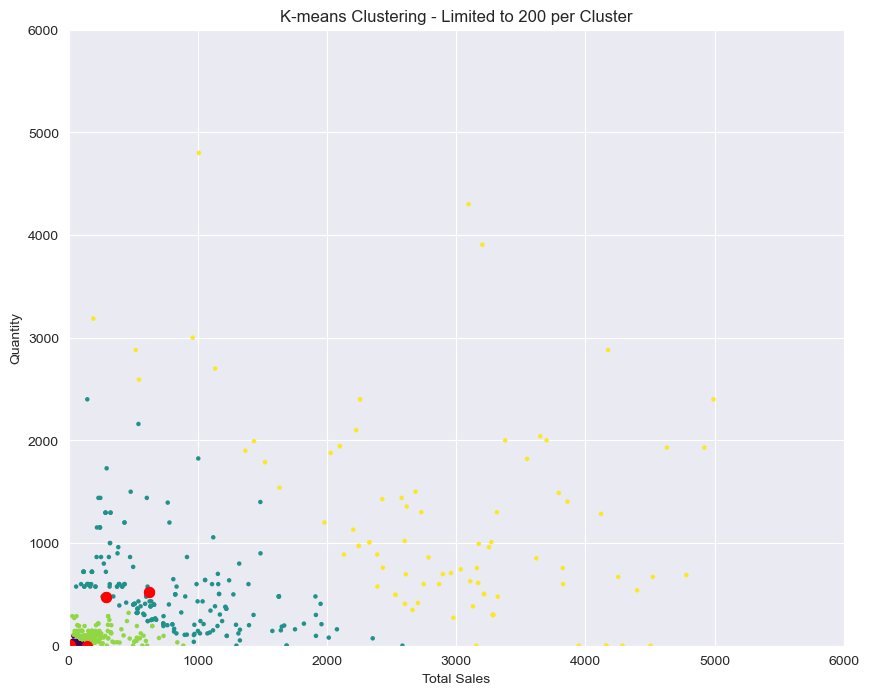

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

 
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='o', label='Centroids')


plt.scatter(sampled_data['Total_sales'], sampled_data['Quantity'], c=sampled_data['Cluster'], cmap='viridis', s=5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, marker='o', label='Centroids')
plt.xlim(0, 6000)  
plt.ylim(0, 6000)  

plt.xlabel('Total Sales')
plt.ylabel('Quantity')
plt.title('K-means Clustering - Limited to 200 per Cluster')

plt.show()

The plot has 2 axis quantity and total_sales so the value of total order price. 

ON the plot above we can observe how different points belong to different cluster, which in this scenario we have 6. Red dots are centroid on this plot their visibility is not the best. 


## MAP REDUCE 

It's a model used for processing and generating large datasets that can be divided into independent chunks. 

In [90]:
#map step
mapped_data = df[['CustomerID', 'Total_sales']]

#reduce step: Aggregate by CustomerID
customer_sales = mapped_data.groupby('CustomerID').agg({'Total_sales': 'sum'}).reset_index()

print(customer_sales.head(10))
print('Mean value spent by customer: ',customer_sales['Total_sales'].mean())

   CustomerID  Total_sales
0     12346.0     77183.60
1     12347.0      4310.00
2     12348.0      1797.24
3     12349.0      1757.55
4     12350.0       334.40
5     12352.0      2506.04
6     12353.0        89.00
7     12354.0      1079.40
8     12355.0       459.40
9     12356.0      2811.43
Mean value spent by customer:  2054.2664601198708


Now I'm performing a data preparation idea which I find on kaggle which I believe might be super useful to present Mixture of Gaussians and other techniques. 

In [147]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df = df.dropna(subset=['Description'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['Total_sales'] = df['Quantity'] * df['UnitPrice'] #Amount is a value spent by particular Client 

In [148]:
#Amount is a value spent by particular Client 
amount = df.groupby('CustomerID')['Total_sales'].sum()
amount = amount.reset_index()
amount.columns = ['CustomerID', 'Amount']

#Frequency is the number of transactions done by particular client
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']

df_new = pd.merge(amount, frequency, on='CustomerID', how="inner")
df_new.head()



,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


##  Gaussian Mixture Model

In [149]:
data_for_gmm = df_new[['Amount', 'Frequency']]

#normalisation
scaler = StandardScaler()
data_for_gmm_scaled = scaler.fit_transform(data_for_gmm)

gmm = GaussianMixture(n_components=6, covariance_type='full')
y_gmm = gmm.fit_predict(data_for_gmm_scaled)

df_new['Cluster'] = y_gmm
print(df_new.head())
df_new['Cluster'].value_counts()


   CustomerID    Amount  Frequency  Cluster
0     12346.0  77183.60          1        2
1     12347.0   4310.00        182        3
2     12348.0   1797.24         31        3
3     12349.0   1757.55         73        4
4     12350.0    334.40         17        0


Cluster
4    1642
0    1417
3     929
5     297
2      49
1       4
Name: count, dtype: int64

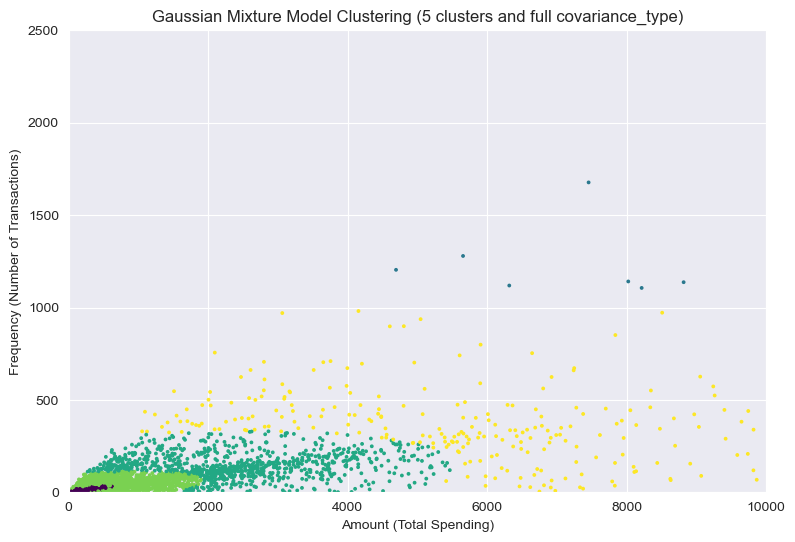

In [150]:
plt.figure(figsize=(9, 6))
plt.scatter(df_new['Amount'], df_new['Frequency'], c=df_new['Cluster'], cmap='viridis', s=3)

plt.xlabel('Amount (Total Spending)')
plt.ylabel('Frequency (Number of Transactions)')
plt.title('Gaussian Mixture Model Clustering (5 clusters and full covariance_type)')

#limitation for axis
plt.xlim(0, 10000)
plt.ylim(0, 2500)
plt.show()

Testing another Gaussian mixture model 

In [151]:
gmm_sph = GaussianMixture(n_components=6, covariance_type='spherical')
y_gmm_sph = gmm_sph.fit_predict(data_for_gmm_scaled)

df_new['Cluster-Gaussian-SPH'] = y_gmm_sph
df_new['Cluster-Gaussian-SPH'].value_counts()

Cluster-Gaussian-SPH
0    1383
4    1259
2     920
5     541
1     199
3      36
Name: count, dtype: int64

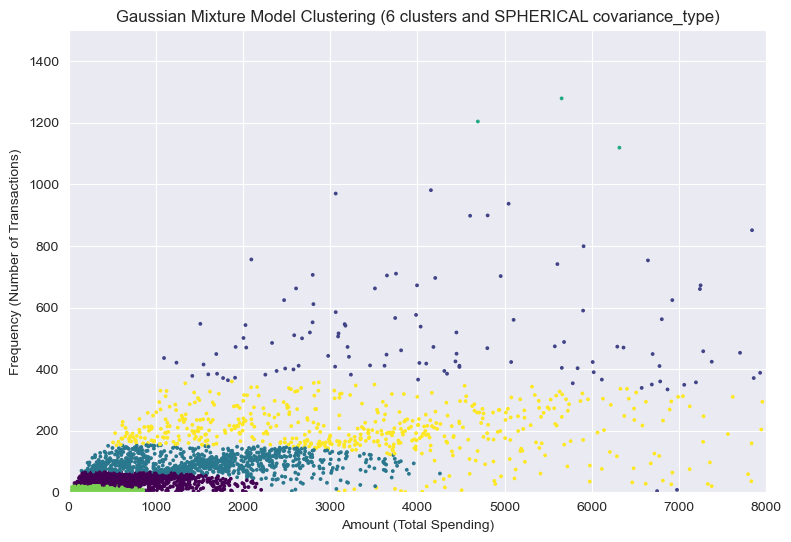

In [152]:
plt.figure(figsize=(9, 6))
plt.scatter(df_new['Amount'], df_new['Frequency'], c=df_new['Cluster-Gaussian-SPH'], cmap='viridis', s=3)

plt.xlabel('Amount (Total Spending)')
plt.ylabel('Frequency (Number of Transactions)')
plt.title('Gaussian Mixture Model Clustering (6 clusters and SPHERICAL covariance_type)')

#limitation for axis
plt.xlim(0, 8000)
plt.ylim(0, 1500)
plt.show()

We can observe that both model performance is good, every cluster has a lot o elements, we can't observe any type of disparity in Cluster and number of points in each of them. 

1. IN the first model (FULL): : The clusters can take elliptical shapes, as the full covariance type allows flexibility to model the spread of data in any direction.
2. In the second model: (Spherical): is simpler and less adaptive to various situations. 

In [153]:
kmeans_basic = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans_basic.fit_predict(data_for_gmm_scaled)

df_new['Cluster-KMeans'] = y_kmeans
df_new['Cluster-KMeans'].value_counts()

Cluster-KMeans
0    3730
3     540
5      46
4      14
2       4
1       4
Name: count, dtype: int64

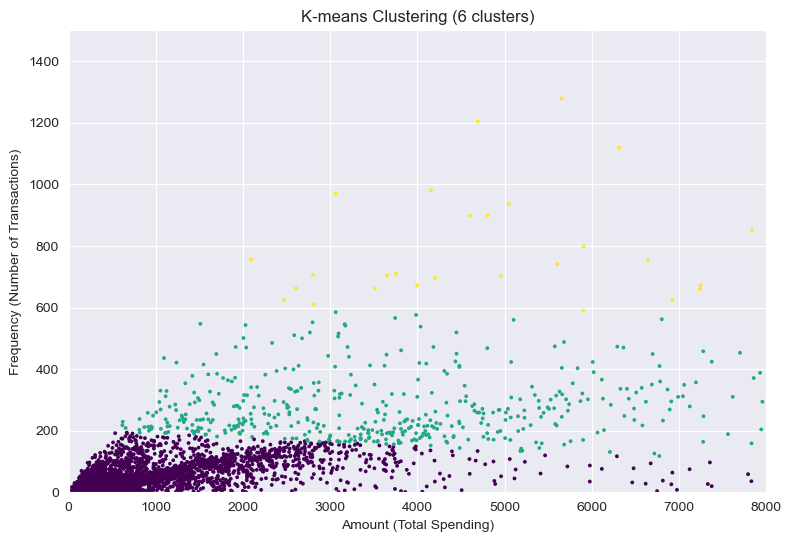

In [154]:
plt.figure(figsize=(9, 6))
plt.scatter(df_new['Amount'], df_new['Frequency'], c=df_new['Cluster-KMeans'], cmap='viridis', s=3)

plt.xlabel('Amount (Total Spending)')
plt.ylabel('Frequency (Number of Transactions)')
plt.title('K-means Clustering (6 clusters)')

#limitation for axis
plt.xlim(0, 8000)
plt.ylim(0, 1500)
plt.show()

K-means clustering on Amount and Frequency. 

## Soft Assignments in Gaussian Mixture model

In [155]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm.fit(data_for_gmm_scaled)

soft_assignments = gmm.predict_proba(data_for_gmm_scaled) #calcuation of probability for points to belong to each cluster 

for i in range(soft_assignments.shape[1]):
    df_new['Cluster-Soft-Assignment-%d' % i] = soft_assignments[:, i]
df_new.head()

,CustomerID,Amount,Frequency,Cluster,Cluster-Gaussian-SPH,Cluster-KMeans,Cluster-Soft-Assignment-0,Cluster-Soft-Assignment-1,Cluster-Soft-Assignment-2,Cluster-Soft-Assignment-3,Cluster-Soft-Assignment-4
0,12346.0,77183.60,1,2,3,4,0.000000e+00,9.962354e-01,0.003765,0.000000,8.579858e-246
1,12347.0,4310.00,182,3,5,3,3.625516e-96,1.211649e-04,0.001600,0.000191,9.980880e-01
2,12348.0,1797.24,31,3,0,0,2.531735e-28,1.885027e-05,0.000245,0.943345,5.639128e-02
3,12349.0,1757.55,73,4,2,0,1.952145e-12,5.950230e-06,0.000075,0.974841,2.507801e-02
4,12350.0,334.40,17,0,4,0,9.778947e-01,1.933524e-07,0.000002,0.021818,2.850038e-04


Visualisation - probability of belonging to particular cluster. 

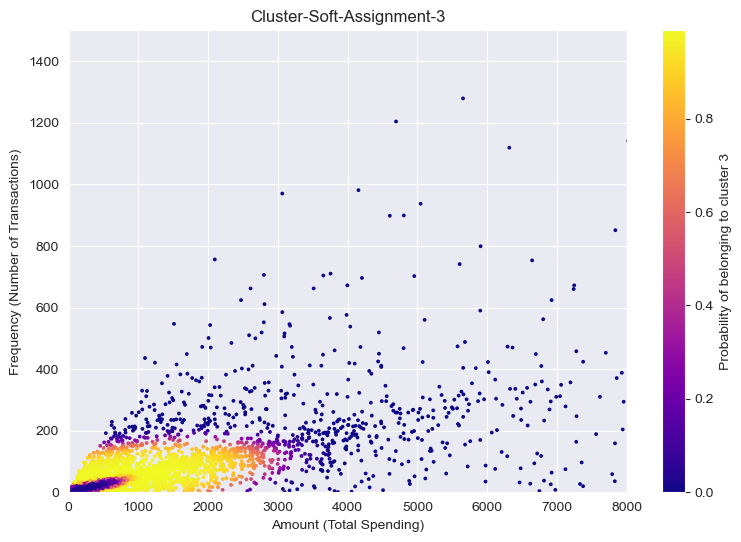

In [162]:
plt.figure(figsize=(9, 6))
plt.scatter(df_new['Amount'], df_new['Frequency'], c=df_new['Cluster-Soft-Assignment-3'], cmap='plasma', s=3 )

plt.xlabel('Amount (Total Spending)')
plt.ylabel('Frequency (Number of Transactions)')
plt.title('Cluster-Soft-Assignment-3')

plt.colorbar(label='Probability of belonging to cluster 3')

#limitation for axis
plt.xlim(0, 8000)
plt.ylim(0, 1500)
plt.show()

Soft assignment algorithm allows us to check the reliability for points to belong to Cluster assign by our model. 

## Hierarchical Clustering

This method of cluster analysis that builds a hierarchy of clusters, either by agglomerating individual points into clusters (agglomerative) or dividing a large cluster into smaller clusters (divisive). It does not require specifying the number of clusters in advance and provides a dendrogram to visualize the merging or splitting process.

In [176]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

data_for_hc = df_new[['Amount', 'Frequency']]
#normalisation
scaler = StandardScaler()
data_for_hc_scaled = scaler.fit_transform(data_for_hc)

#Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_hc = hc.fit_predict(data_for_hc_scaled)

df_new['Cluster_HC'] = y_hc
df_new['Cluster_HC'].value_counts()

Cluster_HC
0    3987
1     328
4      11
3       4
5       4
2       4
Name: count, dtype: int64

Agglomerative clustering starts by treating each data point as a separate cluster and iteratively merges the most similar clusters until the desired number of clusters is reached, in out case it's 6. 

In [177]:
score = silhouette_score(data_for_hc_scaled, y_hc)
print('silhouette score:', score)

silhouette score: 0.7785588716592545


Score which shows how good cluster are, so how close point are to their cluster centroids, and how good they are separated from the other ones. 

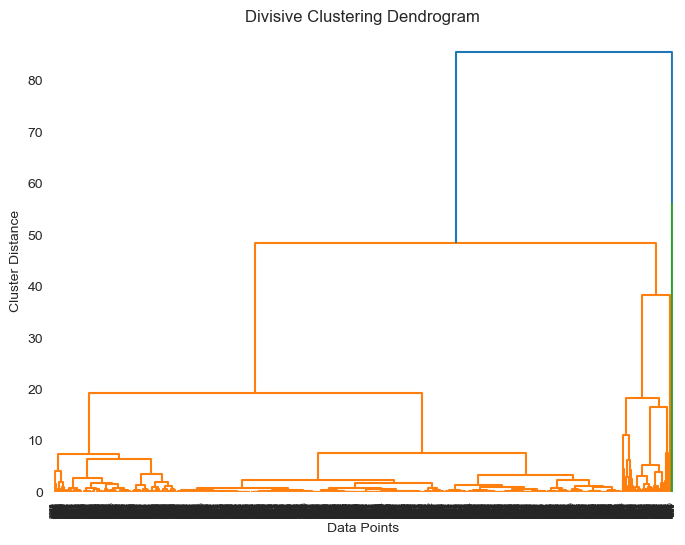

In [183]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

#Divisive Clustering
Z = linkage(data_for_hc_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title("Divisive Clustering Dendrogram")
plt.xlabel('Data Points')
plt.ylabel('Cluster Distance')
plt.show()


Divisive clustering starts with all data points in a single cluster and recursively splits it into smaller clusters. 

And now we can choose where to cut this dendrogram and then every branch becomes a separate cluster. In this case I will probably choose to cut this dendrogram at around 40-50, which is the distance between cluster, but it all depends on the analysis we want to make. 

ADAM NOWAK